## Graphics

### Imports

In [165]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Code

In [166]:
df = pd.read_csv("telecom_churn")
df = df.drop("Unnamed: 0", 1)

Text(0,0.5,'минуты')

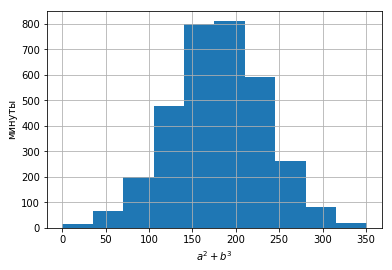

In [167]:
df['Total day minutes'].hist();
plt.xlabel(r'$a^2 + b^3$')
plt.ylabel('минуты')

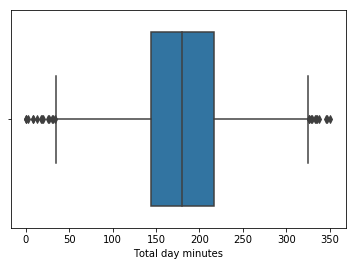

In [168]:
sns.boxplot(df['Total day minutes']);

In [169]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: State, dtype: int64

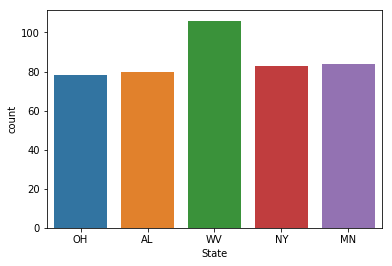

In [170]:
states = df["State"].value_counts().head()
isin = df["State"].isin(states.index)
sns.countplot(df[isin]["State"]);

['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']


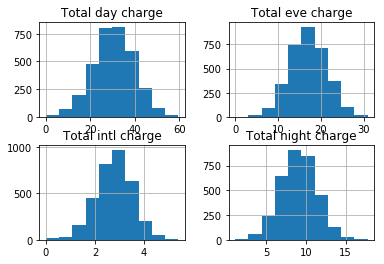

In [171]:
feat = [f for f in df.columns if "charge" in f]
print(feat)
df[feat].hist();

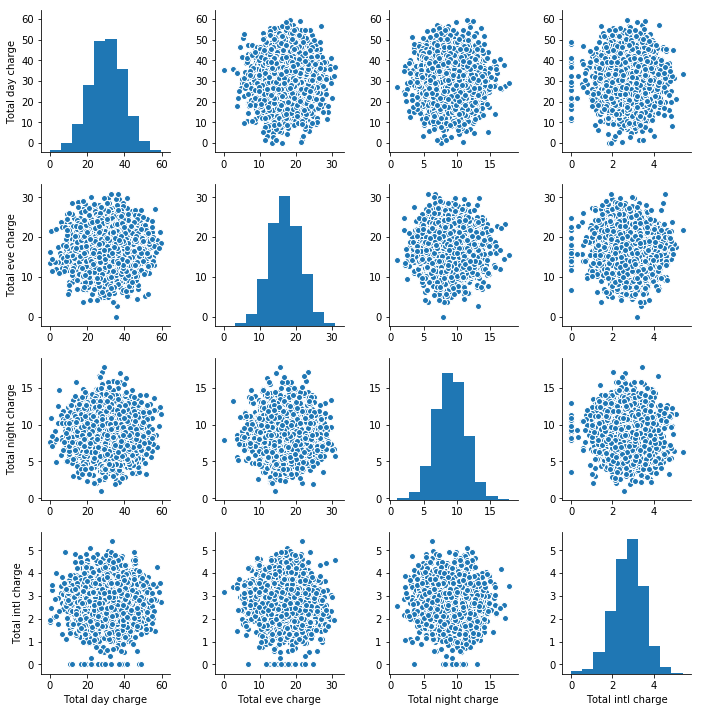

In [172]:
sns.pairplot(df[feat]);

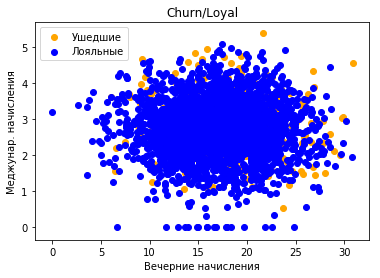

In [173]:
plt.scatter(df[df["Churn"]]["Total eve charge"],
            df[df["Churn"]]["Total intl charge"],
            color="orange", label="Ушедшие");

plt.scatter(df[~df["Churn"]]["Total eve charge"],
            df[~df["Churn"]]["Total intl charge"],
            color="blue", label="Лояльные");

plt.xlabel('Вечерние начисления');
plt.ylabel('Меджунар. начисления');
plt.legend();
plt.title("Churn/Loyal");

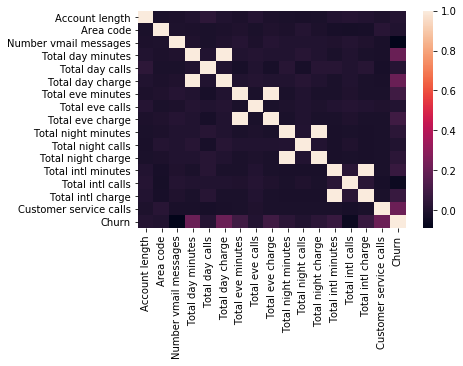

In [174]:
sns.heatmap(df.corr());

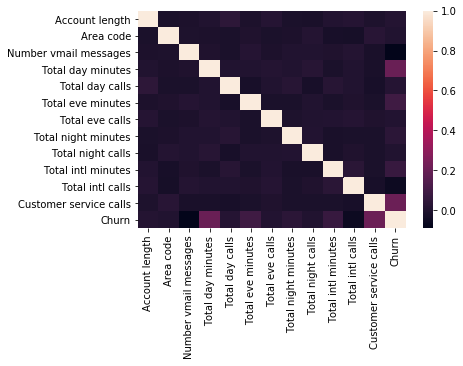

In [175]:
df.drop(feat, axis=1, inplace=True)
len(df.columns)
sns.heatmap(df.corr());

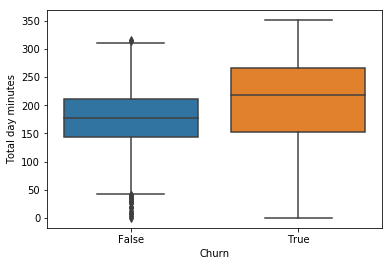

In [176]:
sns.boxplot(x='Churn', y='Total day minutes', data=df)

In [188]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

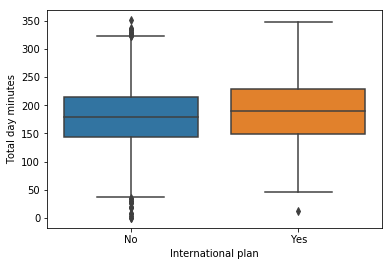

In [190]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

In [192]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


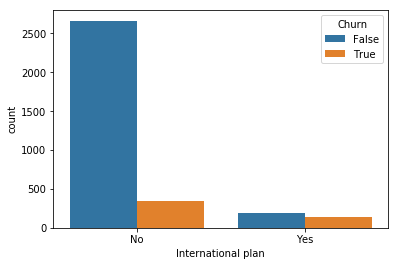

In [194]:
sns.countplot(x='International plan', hue='Churn', data=df);

In [196]:
from sklearn.manifold import TSNE

In [197]:
tsne = TSNE(random_state=0)